In [27]:
library(tidyverse)
library(ggrepel)

In [28]:
path = "/home/and/RIDIR/Code/Validation/"
dataset = "Source2000/"
spark_intensive = read_tsv(paste0(path, dataset, "geospark_intensive.tsv"), col_names = F) %>%
    rename(tid = X1, spark = X2) %>%
    arrange(tid)

spark_intensive %>% show

Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_double()
)


# A tibble: 366 x 2
   tid          spark
   <chr>        <dbl>
 1 T42101000001 1.32 
 2 T42101000002 0.461
 3 T42101000003 3.77 
 4 T42101000004 0.939
 5 T42101000005 0.135
 6 T42101000006 0.609
 7 T42101000007 1.33 
 8 T42101000008 2.38 
 9 T42101000009 1.12 
10 T42101000010 4.69 
# … with 356 more rows


In [29]:
pandas_intensive = read_tsv(paste0(path, dataset, "geopandas_intensive.tsv"), col_names = F) %>%
    rename(tid = X1, pandas = X2) %>%
    arrange(tid)

pandas_intensive %>% show

Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_double()
)


# A tibble: 367 x 2
   tid          pandas
   <chr>         <dbl>
 1 T42101000001  1.32 
 2 T42101000002  0.461
 3 T42101000003  3.77 
 4 T42101000004  0.941
 5 T42101000005  0.135
 6 T42101000006  0.609
 7 T42101000007  1.33 
 8 T42101000008  2.38 
 9 T42101000009  1.12 
10 T42101000010  4.69 
# … with 357 more rows


In [30]:
joined = pandas_intensive %>% inner_join(spark_intensive, by="tid") %>% 
    mutate(diff = abs(pandas - spark), label = sprintf("%0.2f", round(abs(pandas - spark), digits = 2)))
joined %>% show

# A tibble: 366 x 5
   tid          pandas spark     diff label
   <chr>         <dbl> <dbl>    <dbl> <chr>
 1 T42101000001  1.32  1.32  5.44e-14 0.00 
 2 T42101000002  0.461 0.461 4.22e-14 0.00 
 3 T42101000003  3.77  3.77  5.70e- 3 0.01 
 4 T42101000004  0.941 0.939 2.62e- 3 0.00 
 5 T42101000005  0.135 0.135 9.16e-16 0.00 
 6 T42101000006  0.609 0.609 6.97e-14 0.00 
 7 T42101000007  1.33  1.33  3.35e-14 0.00 
 8 T42101000008  2.38  2.38  5.55e-14 0.00 
 9 T42101000009  1.12  1.12  2.07e-14 0.00 
10 T42101000010  4.69  4.69  1.62e-13 0.00 
# … with 356 more rows


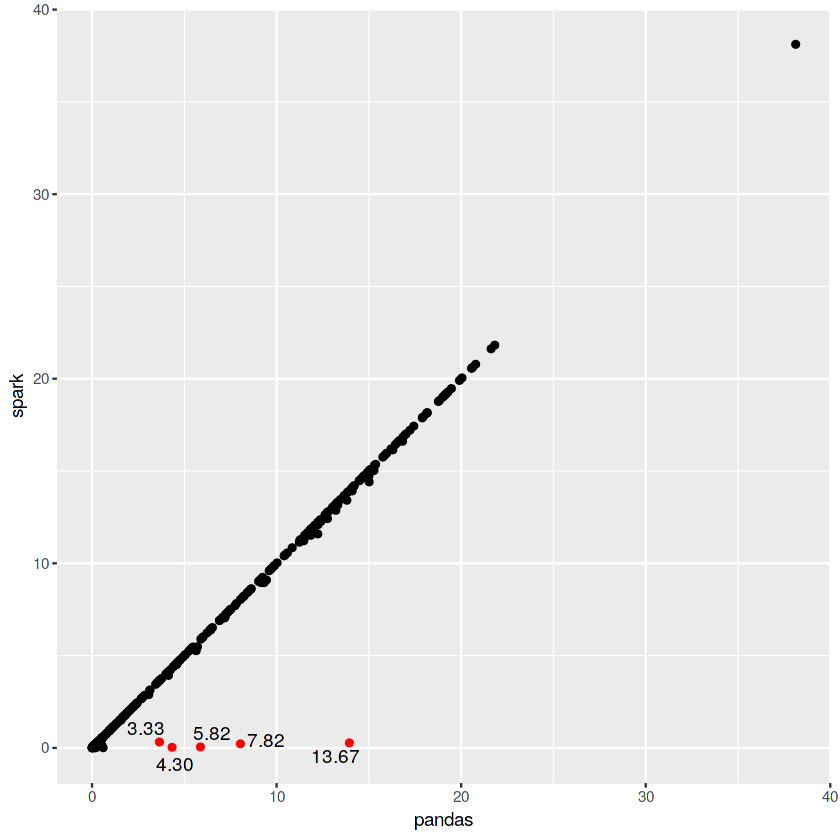

In [31]:
ggplot(data = joined, aes(x = pandas, y = spark, label = label)) + 
    geom_point(color = ifelse(joined$diff > 3, "red", "black")) + 
    geom_text_repel(data = subset(joined, diff > 3), segment.color = "red")

In [32]:
library(MLmetrics)

print(paste("R2:  ", R2_Score(joined$spark, joined$pandas)))
print(paste("RMSE:", RMSE(joined$spark, joined$pandas)))
print(paste("MAE: ", MAE(joined$spark, joined$pandas)))
print(paste("MSE: ", MSE(joined$spark, joined$pandas)))


[1] "R2:   0.979943719396579"
[1] "RMSE: 0.926570198932923"
[1] "MAE:  0.119453175632082"
[1] "MSE:  0.858532333550596"


Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_double()
)


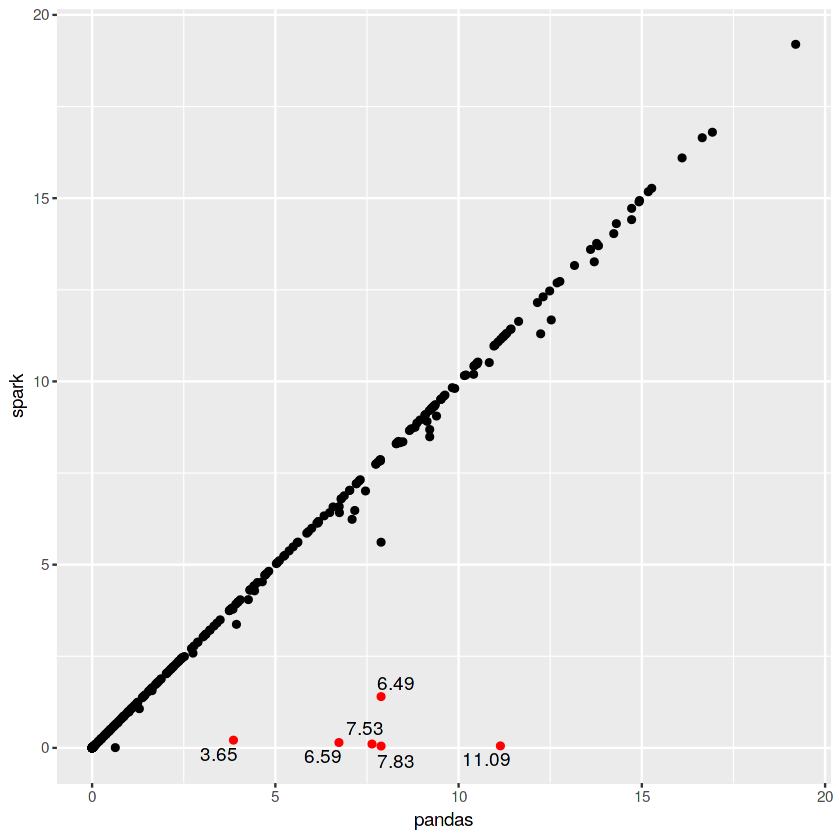

In [33]:
dataset = "Source2010/"
spark_intensive = read_tsv(paste0(path, dataset, "geospark_intensive.tsv"), col_names = F) %>%
    rename(tid = X1, spark = X2) %>%
    arrange(tid)
pandas_intensive = read_tsv(paste0(path, dataset, "geopandas_intensive.tsv"), col_names = F) %>%
    rename(tid = X1, pandas = X2) %>%
    arrange(tid)
joined =  pandas_intensive %>% inner_join(spark_intensive, by="tid") %>%
    mutate(diff = abs(pandas - spark), label = sprintf("%0.2f", round(abs(pandas - spark), digits = 2)))
ggplot(data = joined, aes(x = pandas, y = spark, label = label)) + 
    geom_point(color = ifelse(joined$diff > 3, "red", "black")) + 
    geom_text_repel(data = subset(joined, diff > 3), segment.color = "red")

In [34]:
print(paste("R2:  ", R2_Score(joined$spark, joined$pandas)))
print(paste("RMSE:", RMSE(joined$spark, joined$pandas)))
print(paste("MAE: ", MAE(joined$spark, joined$pandas)))
print(paste("MSE: ", MSE(joined$spark, joined$pandas)))

[1] "R2:   0.9525664004843"
[1] "RMSE: 0.978576379182994"
[1] "MAE:  0.153533971329394"
[1] "MSE:  0.957611729894899"


Why is there different numbers?

In [35]:
pandas_intensive %>% left_join(spark_intensive, by="tid") %>% filter(is.na(spark))

tid,pandas,spark
T42101005099,0,NA
